In [2]:
# General usage
import math
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modeling
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# https://dateutil.readthedocs.io/en/stable/relativedelta.html
from datetime import datetime
from dateutil.relativedelta import relativedelta, MO

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
# df = pd.read_excel('raw/RBA_KYC_Accounts_ALL_Ids.xlsx')
df_metadata_countries = pd.read_excel('raw/RBA Metadata.xlsx', sheet_name='COUNTRIES', keep_default_na=False)
# df = pd.read_excel('raw/RBA_KYC_Accounts_ALL_Ids.xlsx')
df_metadata_countries = pd.read_excel('raw/RBA Metadata.xlsx', sheet_name='COUNTRIES', keep_default_na=False)

In [4]:
# df.to_pickle('storage\RBA_KYC_Accounts_ALL_Ids.pkl')
df = pd.read_pickle('storage/RBA_KYC_Accounts_ALL_Ids.pkl')

In [7]:
print('Esperanza')
print(df.columns[18:27])

Esperanza
Index(['lastUpdate', 'status', 'ledgerCode', 'accountCurrency', 'jointAccount',
       'IsBlackListed', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP'],
      dtype='object')


In [41]:
df.iloc[:, 18:27]

,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP
0,NaN,Active,3.714399,JOD,-0.148768,0,0.054534,-1.475463,-0.032857
1,NaN,Active,0.211318,JOD,-0.148768,0,-0.410042,0.020790,-0.807459
2,NaN,Active,0.257380,JOD,-0.148768,0,-0.410042,0.020790,-0.807459
3,NaN,Active,-0.780194,JOD,-0.148768,0,-0.410042,0.020790,-0.807459
4,NaN,Active,-0.819230,JOD,-0.148768,0,-0.410042,0.020790,-0.807459
...,...,...,...,...,...,...,...,...,...
224863,NaN,Active,-0.811423,JOD,-0.148768,0,-0.410042,0.020790,-1.001110
224864,NaN,Active,3.310768,JOD,-0.148768,0,0.054534,-1.611486,-0.032857
224865,NaN,Active,1.499502,JOD,-0.148768,0,-0.410042,0.020790,0.999946
224866,NaN,Active,0.262845,JOD,-0.148768,0,-0.410042,0.020790,-1.001110


In [42]:
X = df.iloc[:, 18:27]

In [44]:
X.describe

<bound method NDFrame.describe of         lastUpdate  status  ledgerCode accountCurrency  jointAccount  \
0              NaN  Active    3.714399             JOD     -0.148768   
1              NaN  Active    0.211318             JOD     -0.148768   
2              NaN  Active    0.257380             JOD     -0.148768   
3              NaN  Active   -0.780194             JOD     -0.148768   
4              NaN  Active   -0.819230             JOD     -0.148768   
...            ...     ...         ...             ...           ...   
224863         NaN  Active   -0.811423             JOD     -0.148768   
224864         NaN  Active    3.310768             JOD     -0.148768   
224865         NaN  Active    1.499502             JOD     -0.148768   
224866         NaN  Active    0.262845             JOD     -0.148768   
224867         NaN  Active    0.262845             JOD     -0.148768   

        IsBlackListed  CUS_CLASS   ECO_SEC  TYPE_OF_DEP  
0                   0   0.054534 -1.475463 

In [28]:
100*X.isnull().sum()/X.isnull().count()

lastUpdate         100.0
status               0.0
ledgerCode           0.0
accountCurrency      0.0
jointAccount         0.0
IsBlackListed        0.0
CUS_CLASS            0.0
ECO_SEC              0.0
TYPE_OF_DEP          0.0
dtype: float64

In [45]:
num_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
lastUpdate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ledgerCode,224868.0,5.498509e-15,1.000002,-0.819230,-0.811423,0.189458,0.262845,5.965209
jointAccount,224868.0,2.906594e-15,1.000002,-0.148768,-0.148768,-0.148768,-0.148768,6.721876
IsBlackListed,224868.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CUS_CLASS,224868.0,-1.354749e-13,1.000002,-0.874617,-0.410042,-0.410042,-0.410042,10.972059
ECO_SEC,224868.0,-1.140336e-14,1.000002,-3.039728,0.020790,0.020790,0.020790,10.290529
TYPE_OF_DEP,224868.0,8.162134e-14,1.000002,-2.292114,-1.001110,-0.032857,0.999946,4.162906


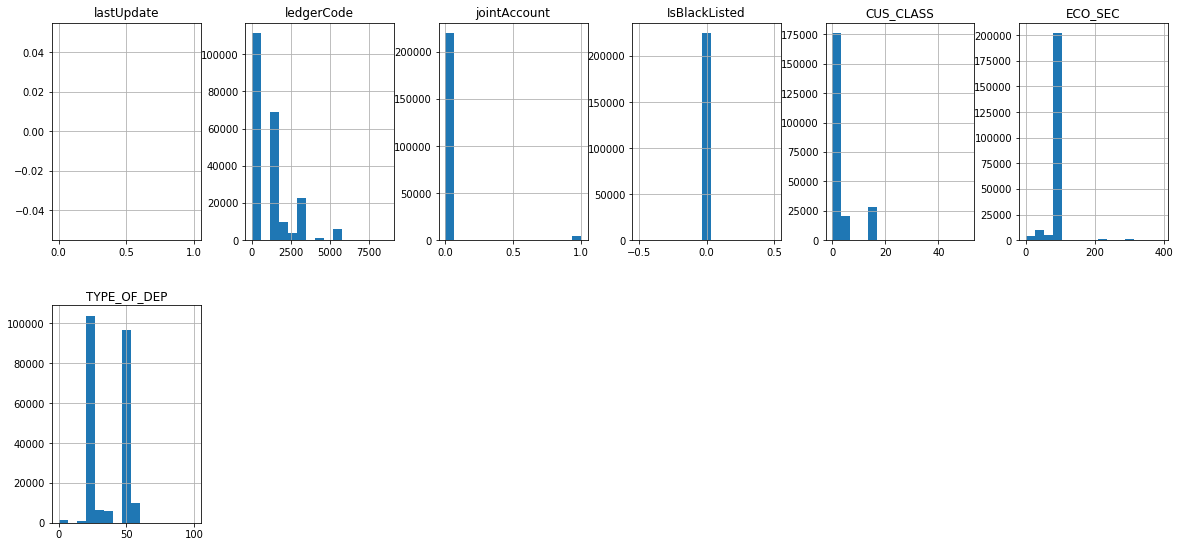

In [29]:
X.select_dtypes(include=['int64', 'float64']).hist(bins=15, figsize=(20, 30), layout=(6, 6));

In [47]:
#Last update can be deleted as it contains only nulls. IsBlacklisted can be deleted as it only contains zero values.

In [48]:
X.dropna(axis='columns', how='all', inplace=True)

In [49]:
X.columns[X.nunique()==1]

Index(['status', 'IsBlackListed'], dtype='object')

In [50]:
X.drop([ 'status', 'IsBlackListed'], axis=1, inplace=True)

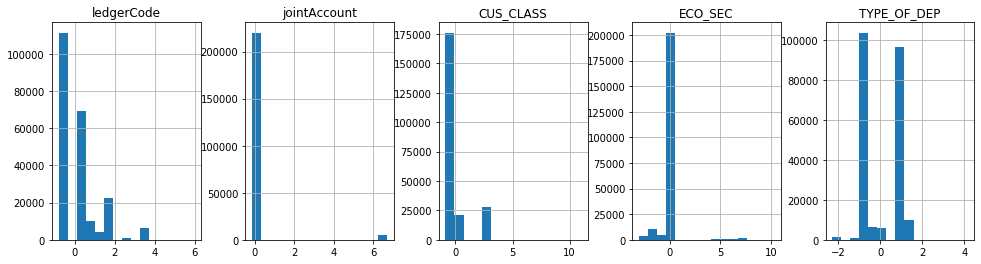

In [51]:
X.select_dtypes(include=['int64', 'float64']).hist(bins=15, figsize=(20, 30), layout=(6, 6));

In [59]:
X.mode()

,ledgerCode,accountCurrency,jointAccount,CUS_CLASS,ECO_SEC,TYPE_OF_DEP
0,-0.81923,JOD,-0.148768,-0.410042,0.02079,-1.00111


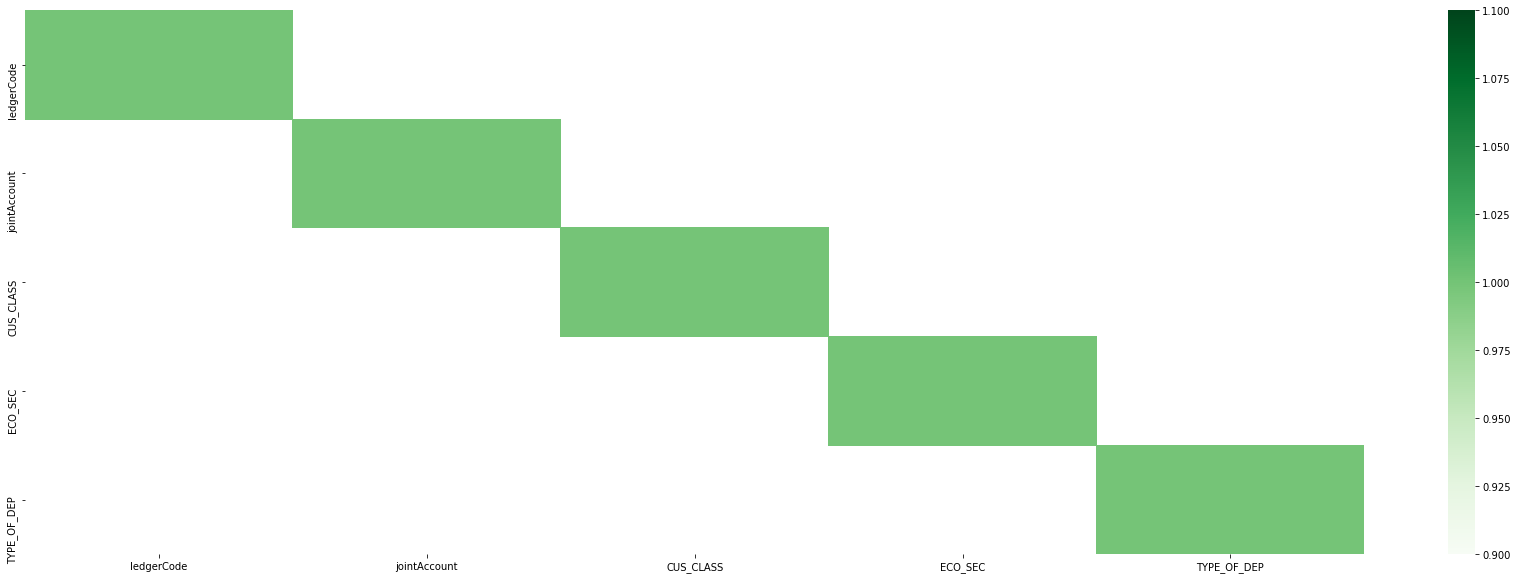

In [56]:
corr = X.corr()

kot = corr[corr>=.9]
plt.figure(figsize=(30,10))
sns.heatmap(kot, cmap="Greens")

In [57]:
num_columns = X.select_dtypes(include=['int64', 'float64']).columns
num_feats = X.loc[:, num_columns]

for var in num_columns:
    if sum(1*num_feats[var].isnull()):
        print(var, 'has missings')
        mean_ = cat_feats[var].mean().iloc[0]
        num_feats.loc[num_feats[var].isnull(), var] = mean_
        num_feats[var+'_missing'] = 1*num_feats[var].isnull()

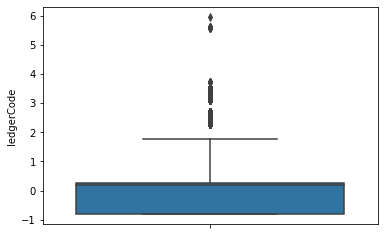

In [71]:
import seaborn as sns
sns.boxplot(y=df['ledgerCode'])

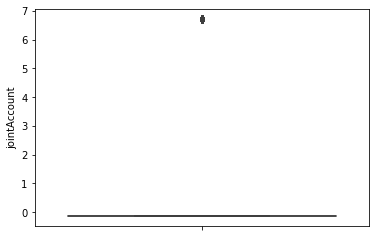

In [72]:
import seaborn as sns
sns.boxplot(y=df['jointAccount'])

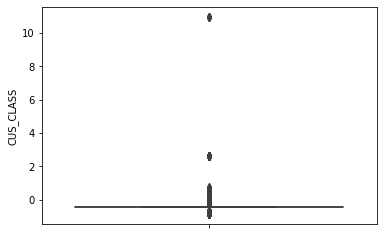

In [73]:
import seaborn as sns
sns.boxplot(y=df['CUS_CLASS'])

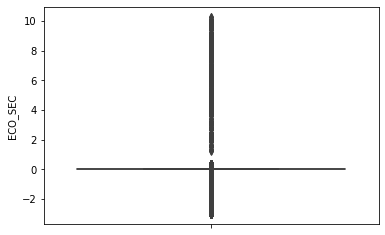

In [74]:
import seaborn as sns
sns.boxplot(y=df['ECO_SEC'])

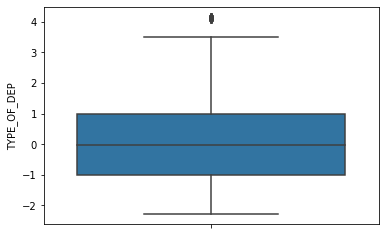

In [75]:
import seaborn as sns
sns.boxplot(y=df['TYPE_OF_DEP'])